# US09 - Introdução

Na qualidade de gestor de espaços verdes (GEV), é importante conhecer os custos exatos associados ao consumo de água em cada parque específico. Esta informação permite gerir estas despesas de forma eficiente.

Como tal, propomos uma análise estatística do consumo de água e dos custos associados em todos os parques municipais. O ficheiro "water_consumption.csv" contém os dados diários de consumo de água (em m3) desde a data de abertura de cada parque. O preço da água é de 0,7 €/m3 até um consumo mensal de 1000 m3, acrescentando-se uma taxa de 15% para consumos superiores.

O ficheiro de dados contém as seguintes informações: "Identificação do Parque", "Ano", "Mês", "Dia" e "Consumo". Iremos utilizar estes dados para obter os seguintes resultados:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

# menu
def menu():
    print("Options:")
    print("1. Get monthly water consumption of a green space")
    print("2. Get costs of monthly water consumptions")
    print("3. Exit")

def opcao1():
    year = int(input("Year: "))
    startMonth = int(input("Start month: "))
    endMonth = int(input("End month: "))
    parkId = input("Park ID: ")
    monthly_water_consumption(year, startMonth, endMonth, parkId='Cidade')
    
def opcao2():
    nParks = int(input("Number of parks: "))
    parkIds = []
    for i in range(nParks):
        parkId = input("Park ID: ")
        parkIds.append(parkId)
    average_monthly_costs(nParks,parkIds)  
    highest_lowest_consumption()
    
# obtain data
data = pd.read_csv('water_consumption.csv', sep=';')

# get datetime
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# convert consumption column to numeric
data['Consumption'] = pd.to_numeric(data['Consumption'].str.replace(',', '.'), errors='coerce')

def monthly_water_consumption(year, startMonth, endMonth, parkId):
    # filter data with requested park and between startMonth and endMonth in requested year
    filtered_data = data[(data['Park'] == parkId) & 
                         (data['Date'].dt.year == year) & 
                         (data['Date'].dt.month >= startMonth) & 
                         (data['Date'].dt.month <= endMonth)]
    
    # group filtered data by month and calculate consumption
    monthly_consumption = filtered_data.groupby(filtered_data['Date'].dt.month)['Consumption'].sum()
    
    # filter months to plot
    months_to_plot = range(startMonth, endMonth+1)
    monthly_consumption = monthly_consumption.loc[months_to_plot]

    # create barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=monthly_consumption.index, y=monthly_consumption.values)
    plt.title(f'Monthly Water Consumption for Park {parkId} between {startMonth}/{year} and {endMonth}/{year}')
    plt.xlabel('Month')
    plt.ylabel('Total Consumption')
    
    # show only the requested months
    num_months = len(monthly_consumption.index)
    ticks = monthly_consumption.index
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][startMonth-1:endMonth]
    plt.xticks(ticks-startMonth, labels)
    plt.show()

def calculate_costs(monthly_consumption):
    if monthly_consumption <= 1000:
        return monthly_consumption * 0.7
    else:
        normalCost = 1000 * 0.7
        withFee = (monthly_consumption - 1000) * 0.7 * 1.15
        return normalCost + withFee 
    
def average_monthly_costs(nParks, parkIds):
    print('\nAVERAGE OF MONTHLY COSTS\n')
    # filter data with requested park and between startMonth and endMonth in requested year
    for parkId in parkIds:
        filtered_data = data[(data['Park'] == parkId) & 
                             (data['Date'].dt.year >= 2023) & 
                             (data['Date'].dt.month >= 1)]
    
        # group filtered data by month and calculate consumption
        monthly_consumption = filtered_data.groupby([filtered_data['Date'].dt.year.rename('Year'), filtered_data['Date'].dt.month.rename('Month')])['Consumption'].sum()        
        print(f'Parque {parkId}: ')
        monthly_cost = monthly_consumption.apply(calculate_costs)
        #print('Costs: ')
        #print(monthly_cost)
        nMonths = data.groupby([data['Date'].dt.year, data['Date'].dt.month]).ngroups
        calculate_average(monthly_cost, nMonths)
        
def calculate_average(monthly_cost, nMonths):
    totalCost = monthly_cost.sum()
    average = round(totalCost / nMonths, 2)
    print(f'Average of monthly costs: {average}€')
    
def highest_lowest_consumption():
    print('\nPARKS WITH HIGHEST AND LOWEST WATER CONSUMPTION\n')
    global data
    data = data[data['Consumption'] > 0]
    daily_park_consumption = data.groupby(['Date', 'Park'])['Consumption'].sum()
    park_with_max_consumption = daily_park_consumption.idxmax()[1]
    print('Park with highest water consumption in one day:', park_with_max_consumption)
    print('Highest consumption registered: ', data['Consumption'].max())
    park_statistics(park_with_max_consumption)
    park_with_min_consumption = daily_park_consumption.idxmin()[1]
    print('\nPark with lowest (not null) water consumption in one day:', park_with_min_consumption)
    print('Lowest consumption registered: ', data['Consumption'].min())
    park_statistics(park_with_min_consumption)

def histograms_creation(park_data):
    
    # Histogram with 10 classes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].hist(park_data['Consumption'], bins=10, color='skyblue', edgecolor='black')
    axes[0].set_title('Histogram with 10 Classes')
    axes[0].set_xlabel('Consumption')
    axes[0].set_ylabel('Frequency') 
    plt.show()
    
    # Histogram with 100 classes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].hist(park_data['Consumption'], bins=100, color='skyblue', edgecolor='black')
    axes[0].set_title('Histogram with 100 Classes')
    axes[0].set_xlabel('Consumption')
    axes[0].set_ylabel('Frequency')    
    plt.show()

def park_statistics(park_id):
    park_data = data[data['Park'] == park_id]

    # mean, median and standard deviation
    mean = park_data['Consumption'].mean()
    median = park_data['Consumption'].median()
    standardDeviation = park_data['Consumption'].std()

    # coefficient of skewness
    skewness = skew(park_data['Consumption'])

    print(f'Mean consumption: {mean:.2f}')
    print(f'Median consumption: {median:.2f}')
    print(f'Standard deviation: {standardDeviation:.2f}')
    print(f'Coefficient of skewness: {skewness:.2f}')
        
    data_min = (park_data['Consumption'].min())
    data_max = (park_data['Consumption'].max())

    # numero de classes
    nClasses = 5

    # amplitude
    amplitude = (data_max - data_min) / nClasses

    # determinar limites inferiores de cada classe, de acordo com a amplitude
    class_boundaries = [data_min + i * amplitude for i in range(nClasses)]
    class_boundaries.append(data_max)  # adicionar limite superior à última classe

    # Calculate absolute frequency for each class
    absolute_frequencies = []
    for i in range(nClasses):
        lower_bound = class_boundaries[i]
        upper_bound = class_boundaries[i+1]
        frequency = ((park_data['Consumption'] >= lower_bound) & (park_data['Consumption'] <= upper_bound)).sum()
        absolute_frequencies.append(frequency)

    # frequência relativa de cada classe
    total_data_points = data.shape[0]
    relative_frequencies = [freq / total_data_points for freq in absolute_frequencies]

    # criar tabela
    frequency_table = pd.DataFrame({
        'Classe': [f'Classe {i+1}' for i in range(nClasses)],
        'Limite Inferior': class_boundaries[:-1],
        'Limite Superior': class_boundaries[1:],
        'Freq. Absoluta': absolute_frequencies,
        'Freq. Relativa': relative_frequencies
    })
    print('\nRELATIVE AND ABSOLUTE FREQUENCY TABLE\n')
    print(frequency_table)
    check_outliers(park_data, median)
    histograms_creation(park_data)
    
def check_outliers(park_data, median):   
    q1 = park_data['Consumption'].quantile(0.25)
    q3 = park_data['Consumption'].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier threshold
    outlier_threshold = 1.5 * iqr
    
    # Identify outliers
    outliers = park_data[(park_data['Consumption'] < (median - outlier_threshold)) | (park_data['Consumption'] > (median + outlier_threshold))]
    print('\nOUTLIERS\n')
    print(outliers)
    
# funções
while True:
    menu()
    opcao = input("Select:")
    if opcao == '1':
        opcao1()
    elif opcao == '2':
        opcao2()
    elif opcao == '3':
        break
    else:
        print("Invalid option")

#monthly_water_consumption(year=2023, startMonth=1, endMonth=6, parkId='Cidade')
#average_monthly_costs(nParks=3, parkIds=['Cidade','Oriental','ArcaAgua'])

Options:
1. Get monthly water consumption of a green space
2. Get costs of monthly water consumptions
3. Exit


Select: 3


# US09 - Análise e interpretação dos resultados

Analisamos o consumo de água em parques, realizando diversos cálculos e visualizações estatísticas.

1. monthly_water_consumption(ano, mes_inicial, mes_final, id_parque):

Esta função serve como base para outras. Ela filtra os dados de um parque específico entre um intervalo de meses e ano informados, agrupando o consumo por mês e criando um gráfico de barras para visualização.

2. calculate_costs(consumo_mensal):

Esta função calcula o custo mensal da água de acordo com o consumo. Se o consumo for menor ou igual a 1000 unidades, o custo é o consumo multiplicado por 0,7. Acima de 1000, há uma tarifa adicional de 15% sobre o excedente.

3. average_monthly_costs(n_parques, ids_parques):

Esta função calcula o custo médio mensal da água para vários parques. Ela filtra os dados para o ano de 2023 ou superior e agrupa o consumo por mês e parque. Em seguida, calcula o custo para cada mês usando a função calculate_costs e por fim calcula a média dos custos totais dividindo pelo número total de meses com dados.

4. highest_lowest_consumption():

Esta função encontra o parque com maior consumo diário de água e o parque com menor consumo diário (considerando apenas valores positivos). Ela também calcula o valor máximo e mínimo de consumo diário registrados.

5. park_statistics(id_parque):

Esta função realiza diversas análises estatísticas para um parque específico. Ela calcula:

* Média do consumo

$$\overline{X} = \frac{1}{n}\sum\limits_{i=1}^{n} X_i$$
  
* Mediana do consumo

$$M = \begin{cases} \frac{x_({\frac{n}{2}}) + x_({\frac{n+2}{2}})}{2} & \text{se n é par}\\ \\ x_({\frac{n+1}{2}}) & \text{se n é ímpar} \end{cases}$$
  
* Desvio padrão do consumo

$$s = \sqrt{s^2}$$
  
* Coeficiente de assimetria do consumo (Skewness)

$$a_3 = \frac{m_3}{s_3}$$
  
* Frequência absoluta e relativa para classes de consumo (com 5 classes iguais)

$$f_i = \sum_{x \in \text{Class } i} (x)$$

$$f_i^{rel} = \frac{f_i}{N}$$
  
* Detecta outliers (valores discrepantes) com base no IQR (Intervalo Quartilar)

$$IQR = q_3 - q_1$$

$$\text{Outlier Threshold} = 1.5 \times IQR$$
  
* Cria histogramas com 10 e 100 classes para visualizar a distribuição do consumo

O código gera diversos outputs que precisam ser interpretados de acordo com a função utilizada:

* monthly_water_consumption: O gráfico de barras permite visualizar o padrão de consumo de água ao longo dos meses selecionados para um parque específico.
* average_monthly_costs: Esta função fornece o custo médio mensal da água para cada parque. É interessante comparar o custo entre parques e analisar se há variação significativa.
* highest_lowest_consumption: Esta função identifica os parques com maior e menor consumo diário de água, podendo indicar possíveis problemas de má gestão ou vazamentos.
* park_statistics: O output desta função é bastante rica em informações. A média e mediana informam o valor central do consumo, enquanto o desvio padrão indica a dispersão dos dados em torno da média. O coeficiente de assimetria (skewness) indica se a distribuição do consumo é simétrica ou assimétrica (positiva ou negativa). A tabela de frequências permite visualizar a distribuição do consumo em classes, e o histograma é outra ferramenta para visualização da distribuição. A identificação de outliers pode indicar valores atípicos que merecem investigação.

# US10 - Introdução

Como Gestor de Espaços Verdes (GEV), compreender as preferências dos utilizadores é fundamental para gerir e melhorar o parque.

Neste cenário, o parque disponibiliza vários equipamentos, como trilhos para caminhadas, merendas e equipamentos de ginástica. À saída do parque, existe um dispositivo eletrónico com uma lista de todos os equipamentos. Os utilizadores devem selecionar o(s) equipamento(s) que utilizaram nesse dia.

O ficheiro "EquipmentUsed.csv" regista as escolhas de 1000 utilizadores. Iremos utilizar estes dados para criar um gráfico circular que represente, em percentagem, a utilização de cada equipamento do parque. Este gráfico irá permitir-nos identificar quais os equipamentos mais populares e, assim, tomar decisões informadas sobre a manutenção e potencial expansão do parque.

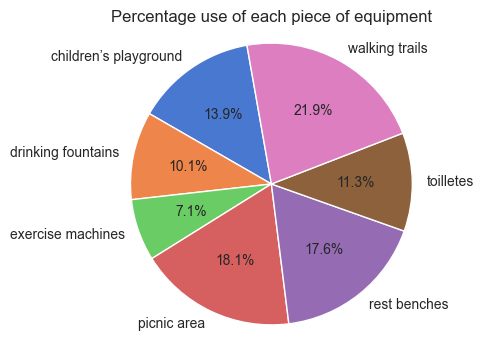

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# obtain data
data = pd.read_csv('EquipmentUsed.csv', sep=';')
#print(data)

# group data
equipment_count = data.groupby(data.columns[0]).size() 
#print(equipment_count)

# pie chart creation
plt.figure(figsize=(4, 4))
plt.pie(equipment_count, labels=equipment_count.index, autopct='%1.1f%%', startangle=100, colors=sns.color_palette('muted'))
plt.axis('equal')
plt.title('Percentage use of each piece of equipment')
#plt.axis('equal')
plt.show()

# US10 - Análise e interpretação dos resultados

Para a criação do gráfico a cima utilizamos os dados de um arquivo CSV "EquipmentUsed.csv" , que contem a frequência de uso de cada equipamento.

Este código cria um gráfico que permite a visualização a distribuição percentual do uso de cada equipamento. O tamanho de cada fatia do pizza representa a proporção do uso de cada equipamento específico em relação ao total.

# US11 - Introdução

Compreender a utilização do parque pelas diferentes faixas etárias é crucial para um Gestor de Espaços Verdes (GEV). Esta informação permite direcionar ações de forma a tornar o parque mais atrativo e inclusivo para todos.

Para analisar o uso do parque, foi inserido um questionário de três perguntas no portal do utilizador:

* Pergunta 1: Faixa Etária
Tipo de Resposta: Categórica (1 - Criança (até 15 anos), 2 - Adulto (16 a 65 anos), 3 - Sénior (acima de 65 anos))

* Pergunta 2: Recomenda o parque a outros?
Tipo de Resposta: Binária (Y/N)

* Pergunta 3: Quantas vezes frequenta o parque por mês?
Tipo de Resposta: Numérica

As respostas obtidas encontram-se guardadas no ficheiro "Inquiry.csv". Iremos utilizar estes dados para:

* Identificar o tipo de variável associada a cada pergunta.

* Analisar a percentagem de utilizadores de cada faixa etária que recomendaria o parque.

* Criar um diagrama de caixa para cada faixa etária, considerando a frequência mensal de utilização do parque. Iremos retirar conclusões sobre os padrões de uso do parque face à idade.


Types of each variables: 
1: variável quantitativa contínua
2: variável qualitativa 
3: variável quantitiva discreta

Proportion of users from each age group who would recommend the park to others
         count  proportion
Escalao                   
1          131       0.473
2          182       0.544
3          187       0.455


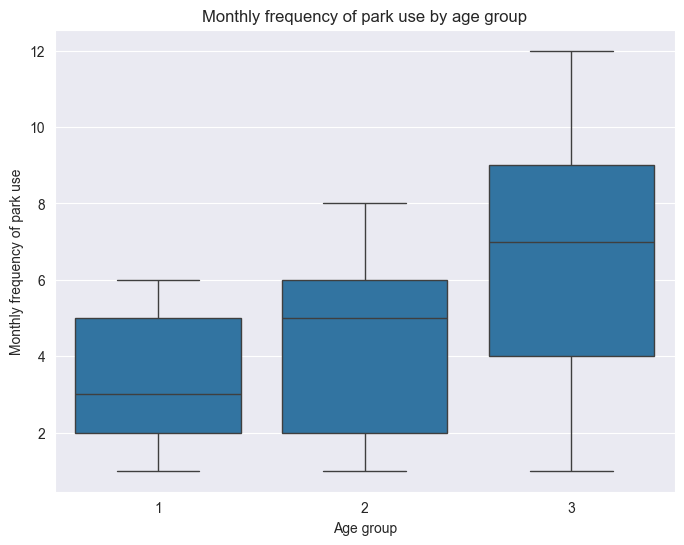

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print('Types of each variables: \n1: variável quantitativa contínua\n2: variável qualitativa \n3: variável quantitiva discreta\n')

# obtain data
data = pd.read_csv('Inquiry.csv', header=0, sep=';')

# group data
age_group_count = data.groupby('Escalao').size()

# calculate proportions
proportion = data.groupby('Escalao')['Y/N'].apply(lambda x: (x == 'Y').sum() / len(x))
results = pd.DataFrame({'count': age_group_count, 'proportion': proportion.round(3)})
print('Proportion of users from each age group who would recommend the park to others')
print(results)

# create boxplot
data['Visits'] = pd.to_numeric(data['Visits'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='Escalao', y='Visits', data=data)
plt.title('Monthly frequency of park use by age group')
plt.xlabel('Age group')
plt.ylabel('Monthly frequency of park use')
plt.show()

# US11 - Análise e interpretação dos resultados

A primeira parte do código calcula algumas estatísticas descritivas para os dados. Ele lê os dados de um arquivo CSV "Inquiry.csv".

Proporção de recomendação por faixa etária: O código calcula a proporção de usuários de cada faixa etária que recomendaria o parque para outras pessoas. Agrupa os dados por faixa etária ("Escalao") e então calcula a média da variável binária "Y/N" (onde "Y" significa recomendação). Os resultados são armazenados no dataframe "results" e impressos.

A segunda parte do código cria um boxplot para visualizar a distribuição da frequência mensal de uso do parque por faixa etária.

Boxplot: O boxplot é um gráfico que mostra a distribuição de um conjunto de dados através de quartis (25%, 50% e 75%) e outliers (valores atípicos). Permite identificar diferenças na distribuição da frequência de uso do parque entre as diferentes faixas etárias. O código define o rótulo do eixo x como "Faixa etária" e o rótulo do eixo y como "Frequência mensal de uso do parque".

Outputs:

1. O tipo de variável associada a cada pergunta.

2. A tabela que mostra a proporção de users que recomendariam o parque para cada faixa etária. 

3. O boxplot mostra a distribuição da frequência de uso do parque. Podemos observar se há alguma faixa etária que utiliza o parque com maior frequência. O boxplot também pode indicar a presença de outliers, que podem ser users que visitam o parque com muita frequência ou pouquíssima frequência.

# Contribution of the group

* 1211134 Pedro Viana - 30%
* 1211199 Eduardo Carreiro - 30%
* 1221401 Beatriz Morais - 40%
